## Setup

In [1]:
%pip install -Uq diffusers ftfy accelerate

# Installing transformers from source for now since we need the latest version for Depth2Img
%pip install -Uq git+https://github.com/huggingface/transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  

In [2]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

from diffusers import (
    StableDiffusionPipeline,
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline,
    StableDiffusionDepth2ImgPipeline
    )

In [3]:
# Set device
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

## Login



In [4]:
from huggingface_hub import notebook_login

notebook_login()

# Stable Diffusion

In [ ]:
# Load the pipeline
model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

#Hiperparametos

In [ ]:
prompt = "watercolor, a faceless figure drinking tea, dynamic shadows. 8k" # @param

negative_prompt = "Text, oversaturated, blurry, low quality, human face, hands:8" #@param

height=480 #@param
width=640  #@param
guidance_scale=8    #@param
num_inference_steps=35 #@param

generator = torch.Generator(device=device).manual_seed(40)

pipe_output = pipe(

    prompt= prompt,
    negative_prompt= negative_prompt,
    height=height,
    width=width,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    generator=generator
)


  0%|          | 0/35 [00:00<?, ?it/s]

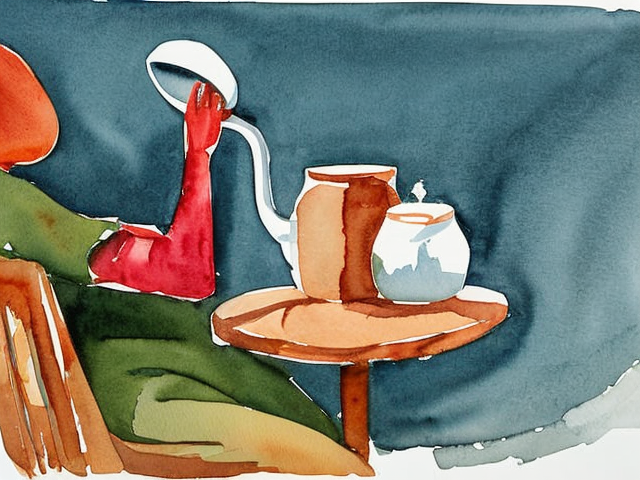

In [ ]:
# View the resulting image
pipe_output.images[0]

## Cfg_scales

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

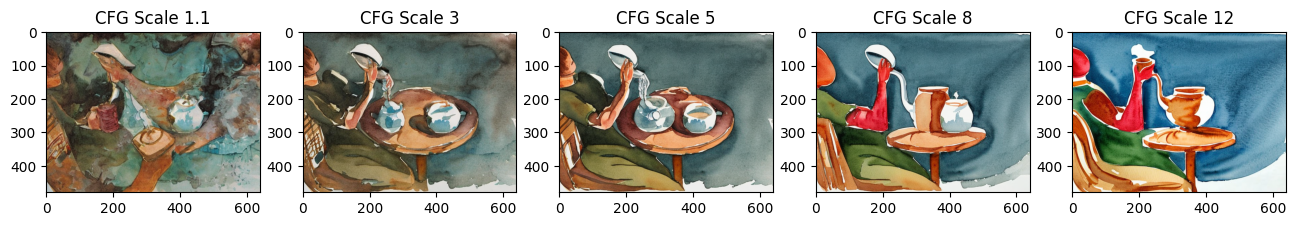

In [ ]:
cfg_scales = [1.1, 3, 5, 8, 12] #@param

prompt = prompt
fig, axs = plt.subplots(1, len(cfg_scales), figsize=(16, 5))

for i, ax in enumerate(axs):
    im = pipe(
        prompt = prompt, #@param
        negative_prompt=negative_prompt, #@param
        height=480, #@param
        width=640, #@param

        guidance_scale=cfg_scales[i],

        num_inference_steps=35, #@param
        generator=torch.Generator(device=device).manual_seed(40),
    ).images[0]

    ax.imshow(im)
    ax.set_title(f"CFG Scale {cfg_scales[i]}")

## Scheduler

In [ ]:
from diffusers import LMSDiscreteScheduler
from diffusers import EulerDiscreteScheduler
from diffusers import EulerAncestralDiscreteScheduler
from diffusers import DPMSolverMultistepScheduler

In [ ]:
# Replace the scheduler
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

  0%|          | 0/35 [00:00<?, ?it/s]

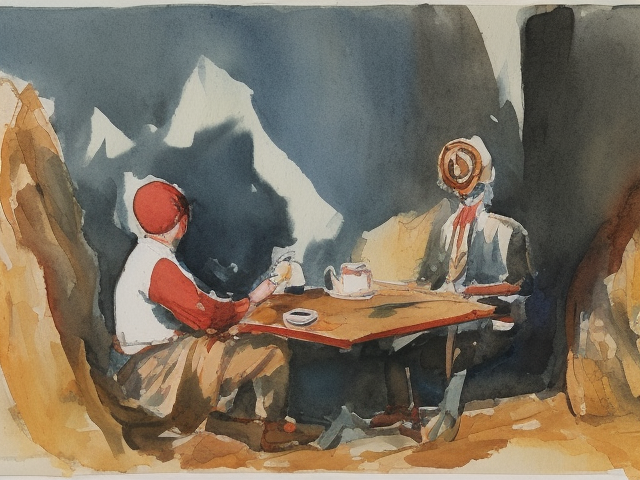

In [ ]:
generator = torch.Generator(device=device).manual_seed(40)

prompt = "watercolor, a faceless figure drinking tea, dynamic shadows. 8k" # @param

negative_prompt = "Text, oversaturated, blurry, low quality, human face, hands:8" #@param

height=480 #@param
width=640  #@param
guidance_scale=3    #@param
num_inference_steps=35 #@param

pipe_output = pipe(

    prompt= prompt,
    negative_prompt= negative_prompt,
    height=height,
    width=width,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    generator=generator
)

# View the resulting image
pipe_output.images[0]

# Img2Img Pipeline

In [ ]:
# Loading an Img2Img pipeline
model_id = "stabilityai/stable-diffusion-2-1-base"
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Replace the scheduler
pipe.scheduler = LMSDiscreteScheduler.from_config(pipe.scheduler.config)

In [ ]:
# https://www.mintmuseum.org/wp-content/uploads/2025/02/2002.68.6_o3-1000x804.jpg
# https://static01.nyt.com/images/2012/07/29/nyregion/29ARTSNJ2_SPAN/29ARTSNJ2-superJumbo.jpg
# https://dasartes.com.br/dasartes.com.br/wp-content/uploads/2021/08/andujar_yanomami_1920-Copy.jpg
# https://ims.com.br/wp-content/uploads/2017/06/P011G00652_1920x1080.jpg

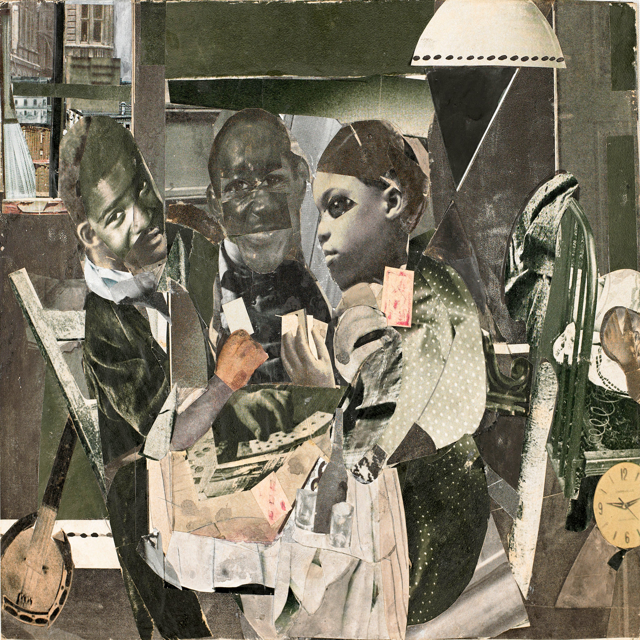

In [ ]:
# We'll use a couple of demo images later in the notebook
def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

#https://www.mintmuseum.org/wp-content/uploads/2025/02/2002.68.6_o3-1000x804.jpg
#https://static01.nyt.com/images/2012/07/29/nyregion/29ARTSNJ2_SPAN/29ARTSNJ2-superJumbo.jpg
# https://dasartes.com.br/dasartes.com.br/wp-content/uploads/2021/08/andujar_yanomami_1920-Copy.jpg https://ims.com.br/wp-content/uploads/2017/06/P011G00652_1920x1080.jpg
# Define the URL of the image you want to download

init_url = "https://static01.nyt.com/images/2012/07/29/nyregion/29ARTSNJ2_SPAN/29ARTSNJ2-superJumbo.jpg" #@param

img_height = 640
img_width = 640

# Use the correct URL when calling download_image
# img_url should be the URL string, not a PIL Image object
init_image = download_image(init_url).resize((img_height, img_width)) # Changed img_url to init_url

init_image

  0%|          | 0/22 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Result')

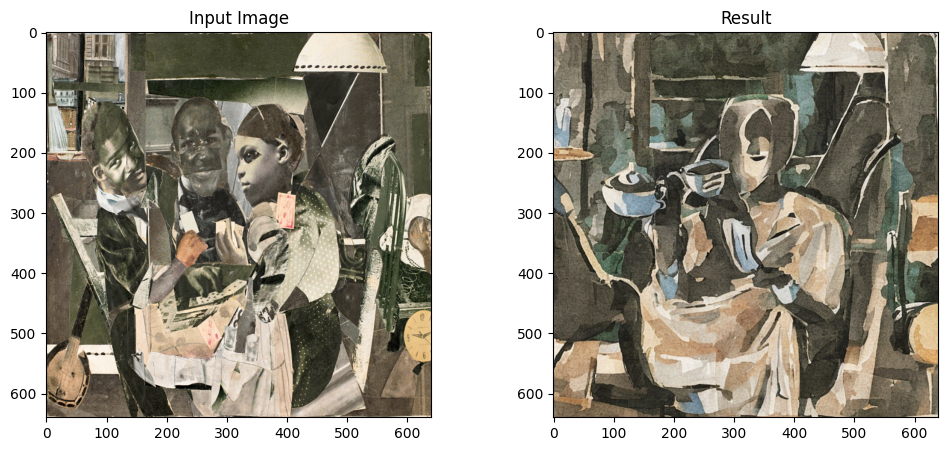

In [ ]:
import numpy as np

# Encode init_image
init_image_tensor = torch.from_numpy(np.array(init_image).transpose(2, 0, 1)).float() / 255.0  # 0~255 => 0~1
init_image_tensor = 2.0 * init_image_tensor - 1.0  # 0~1 => -1~1
init_image_tensor = init_image_tensor.unsqueeze(0).to(device)  # add batch dim.

with torch.no_grad():
    init_image_latents = pipe.vae.encode(init_image_tensor).latent_dist.sample() * pipe.vae.config.scaling_factor

prompt="faceless figure drinking tea, dynamic shadows. 8k" #@param
guidance_scale = 3 #@param
strength = 0.45 #@param
num_inference_steps = 20 #@param


# Apply Img2Img
result_image = img2img_pipe(
    prompt=prompt,
    image=init_image,
    strength=strength
).images[0]

# View the result
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(init_image)
axs[0].set_title("Input Image")
axs[1].imshow(result_image)
axs[1].set_title("Result")

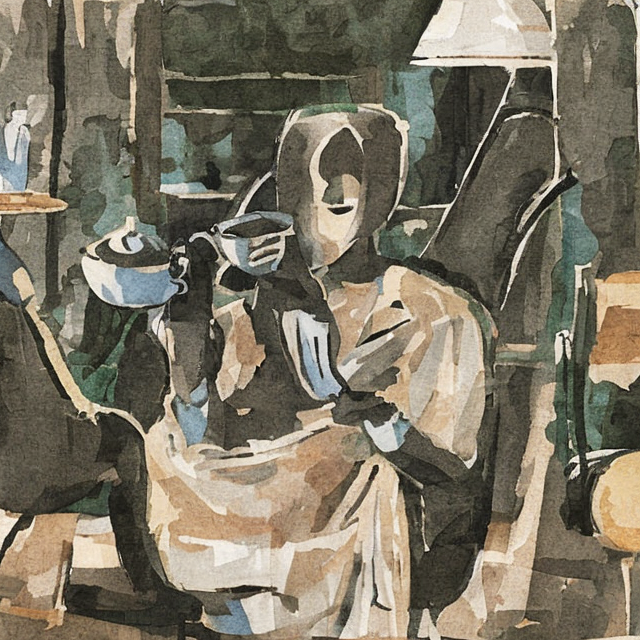

In [ ]:
result_image

## Inpainting Pipeline

[link mask app](https://stevhliu-inpaint-mask-maker.hf.space/)

[para saber mais](https://huggingface.co/docs/diffusers/using-diffusers/inpaint)

In [ ]:
pipe = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting")
pipe = pipe.to(device)

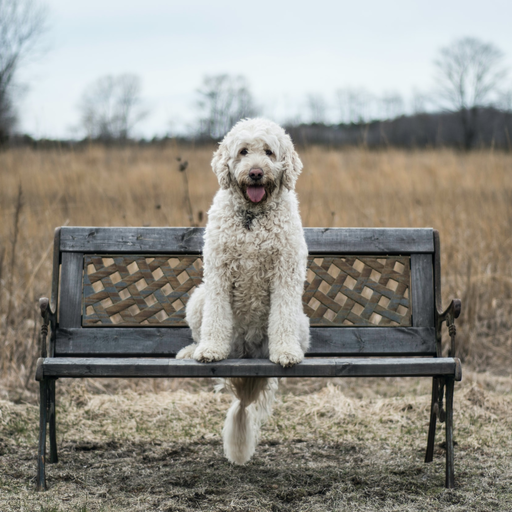

In [ ]:
# Download images for inpainting example
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

img_height = 512 #@param
img_width = 512 #@param

init_image = download_image(img_url).resize((img_height, img_width))
mask_image = download_image(mask_url).resize((img_height, img_width))

image = init_image #@param

image


  0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Result')

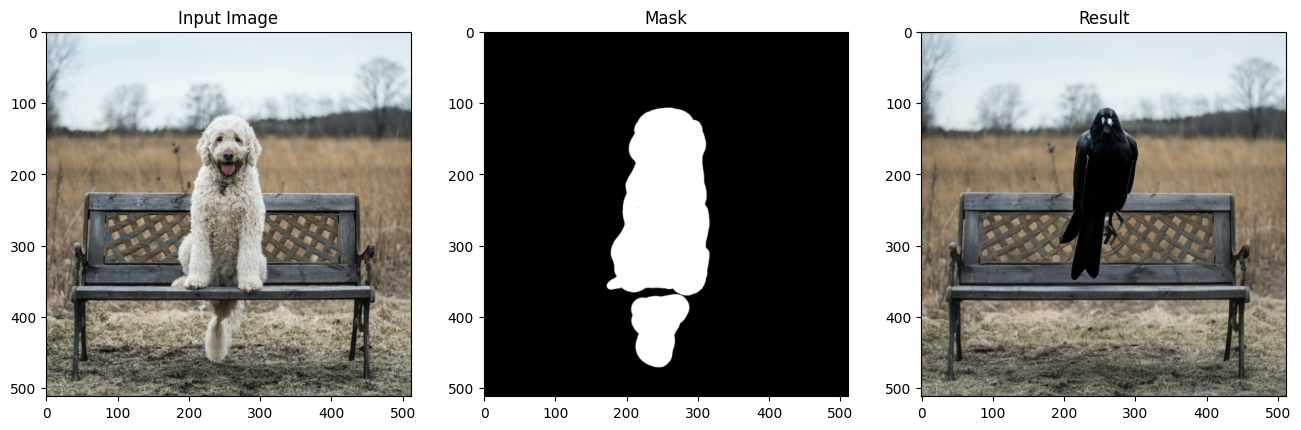

In [ ]:
# Inpaint with a prompt for what we want the result to look like
prompt = "big crow, landed on a park bench, high resolution" #@param
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

# View the result
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs[0].imshow(init_image)
axs[0].set_title("Input Image")
axs[1].imshow(mask_image)
axs[1].set_title("Mask")
axs[2].imshow(image)
axs[2].set_title("Result")


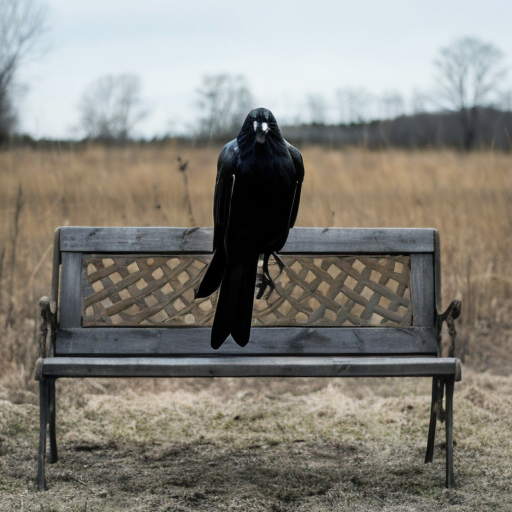

In [ ]:
image

## Depth2Image

In [ ]:
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-2-depth")
pipe = pipe.to(device)

  0%|          | 0/40 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Result')

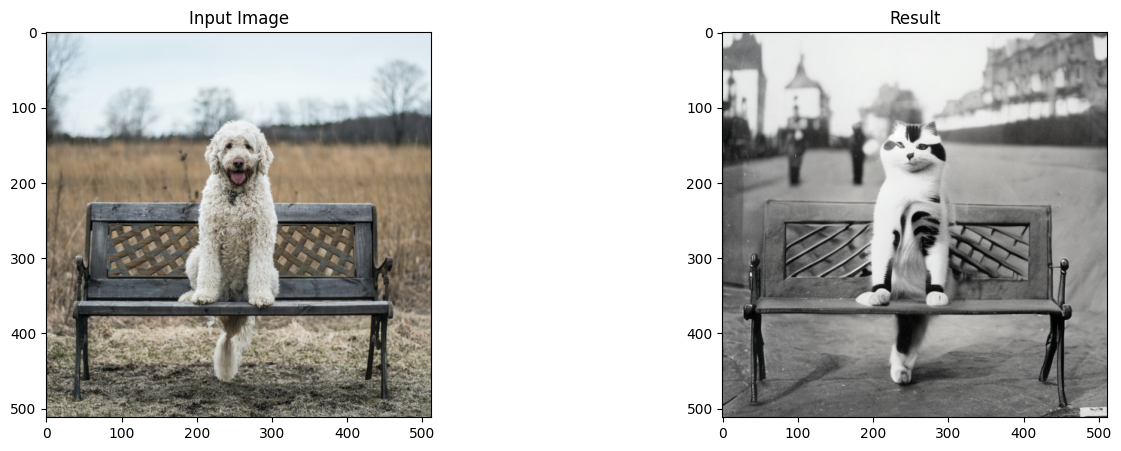

In [ ]:
# Inpaint with a prompt for what we want the result to look like

prompt = "Black and White picture. A cat, 1920 city" #@param

negative_prompt="text, oversaturated, low quality" #@param

image = pipe(
    prompt=prompt,
    negative_prompt= negative_prompt,
    image=init_image).images[0]

# View the result
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].imshow(init_image)
axs[0].set_title("Input Image")
axs[1].imshow(image)
axs[1].set_title("Result")

# DDIM Inversion

In [ ]:
%pip install -q transformers diffusers accelerate

In [ ]:
import torch
import requests
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from io import BytesIO
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms as tfms
from diffusers import StableDiffusionPipeline, DDIMScheduler

In [ ]:
# Useful function for later
def load_image(url, size=None):
    response = requests.get(url,timeout=1)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    if size is not None:
        img = img.resize(size)
    return img

In [ ]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load a pipeline
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base").to(device)

In [ ]:
# Set up a DDIM scheduler
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

##Inversion

##Putting it all together

In [ ]:
# @title Capô
# Sample function (regular DDIM)
@torch.no_grad()
def sample(prompt, start_step=0, start_latents=None,
           guidance_scale=3.5, num_inference_steps=30,
           num_images_per_prompt=1, do_classifier_free_guidance=True,
           negative_prompt='', device=device):

    # Encode prompt
    text_embeddings = pipe._encode_prompt(
            prompt, device, num_images_per_prompt, do_classifier_free_guidance, negative_prompt
    )

    # Set num inference steps
    pipe.scheduler.set_timesteps(num_inference_steps, device=device)

    # Create a random starting point if we don't have one already
    if start_latents is None:
        start_latents = torch.randn(1, 4, 64, 64, device=device)
        start_latents *= pipe.scheduler.init_noise_sigma

    latents = start_latents.clone()

    for i in tqdm(range(start_step, num_inference_steps)):

        t = pipe.scheduler.timesteps[i]

        # Expand the latents if we are doing classifier free guidance
        latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents
        latent_model_input = pipe.scheduler.scale_model_input(latent_model_input, t)

        # Predict the noise residual
        noise_pred = pipe.unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

        # Perform guidance
        if do_classifier_free_guidance:
            noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
            noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)


        # Normally we'd rely on the scheduler to handle the update step:
        # latents = pipe.scheduler.step(noise_pred, t, latents).prev_sample

        # Instead, let's do it ourselves:
        prev_t = max(1, t.item() - (1000//num_inference_steps)) # t-1
        alpha_t = pipe.scheduler.alphas_cumprod[t.item()]
        alpha_t_prev = pipe.scheduler.alphas_cumprod[prev_t]
        predicted_x0 = (latents - (1-alpha_t).sqrt()*noise_pred) / alpha_t.sqrt()
        direction_pointing_to_xt = (1-alpha_t_prev).sqrt()*noise_pred
        latents = alpha_t_prev.sqrt()*predicted_x0 + direction_pointing_to_xt

    # Post-processing
    images = pipe.decode_latents(latents)
    images = pipe.numpy_to_pil(images)

    return images

## Inversion
@torch.no_grad()
def invert(start_latents, prompt, guidance_scale=3.5, num_inference_steps=80,
           num_images_per_prompt=1, do_classifier_free_guidance=True,
           negative_prompt='', device=device):

    # Encode prompt
    text_embeddings = pipe._encode_prompt(
            prompt, device, num_images_per_prompt, do_classifier_free_guidance, negative_prompt
    )

    # Latents are now the specified start latents
    latents = start_latents.clone()

    # We'll keep a list of the inverted latents as the process goes on
    intermediate_latents = []

    # Set num inference steps
    pipe.scheduler.set_timesteps(num_inference_steps, device=device)

    # Reversed timesteps <<<<<<<<<<<<<<<<<<<<
    timesteps = reversed(pipe.scheduler.timesteps)

    for i in tqdm(range(1, num_inference_steps), total=num_inference_steps-1):

        # We'll skip the final iteration
        if i >= num_inference_steps - 1: continue

        t = timesteps[i]

        # Expand the latents if we are doing classifier free guidance
        latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents
        latent_model_input = pipe.scheduler.scale_model_input(latent_model_input, t)

        # Predict the noise residual
        noise_pred = pipe.unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

        # Perform guidance
        if do_classifier_free_guidance:
            noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
            noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

        current_t = max(0, t.item() - (1000//num_inference_steps)) #t
        next_t = t # min(999, t.item() + (1000//num_inference_steps)) # t+1
        alpha_t = pipe.scheduler.alphas_cumprod[current_t]
        alpha_t_next = pipe.scheduler.alphas_cumprod[next_t]

        # Inverted update step (re-arranging the update step to get x(t) (new latents) as a function of x(t-1) (current latents)
        latents = (latents - (1-alpha_t).sqrt()*noise_pred)*(alpha_t_next.sqrt()/alpha_t.sqrt()) + (1-alpha_t_next).sqrt()*noise_pred


        # Store
        intermediate_latents.append(latents)

    return torch.cat(intermediate_latents)

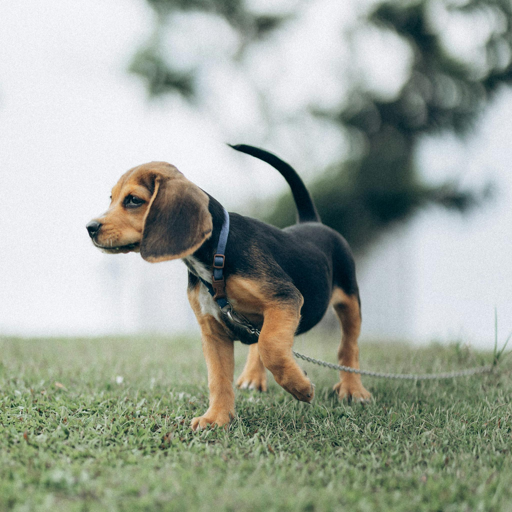

In [ ]:
# https://www.pexels.com/photo/a-beagle-on-green-grass-field-8306128/
input_image = load_image('https://images.pexels.com/photos/8306128/pexels-photo-8306128.jpeg', size=(512, 512))
input_image

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

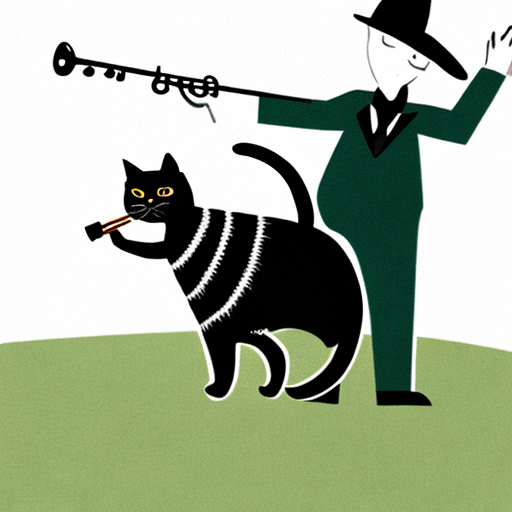

In [ ]:
def edit(input_image, input_image_prompt, edit_prompt, num_steps=100, start_step=30, guidance_scale=3.5):

    with torch.no_grad(): latent = pipe.vae.encode(tfms.functional.to_tensor(input_image).unsqueeze(0).to(device)*2-1)
    l = 0.18215 * latent.latent_dist.sample()

    inverted_latents = invert(l, input_image_prompt, num_inference_steps=num_steps)

    final_im = sample(edit_prompt, start_latents=inverted_latents[-(start_step+1)][None],
                      start_step=start_step, num_inference_steps=num_steps, guidance_scale=guidance_scale)[0]

    return final_im

input_image_prompt = "a man playing jazz guitar with a jazz band" #@param
output_image_prompt = "a cat playing flute with a jazz band with ((a man playing jazz guitar with a jazz band))" #@param
num_steps=60 #@param
start_step=1 #@param
guidance_scale=7 #@param

edit(input_image,
     f'{input_image_prompt}',
     f'{output_image_prompt}',
     num_steps=num_steps,
     start_step=start_step,
     guidance_scale=guidance_scale)
